<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/ET_Bagging(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bagging

### What is Bagging (Bootstrap Aggregating)?

Bagging stands for **Bootstrap Aggregating**. It's a general-purpose ensemble method that works by training multiple models of the same type on different subsets of the training data, and then combining their predictions. The core ideas are:

1.  **Bootstrapping**: Creating multiple subsets of the original training data by sampling with replacement. This means that some data points may appear multiple times in a subset, while others may not appear at all.
2.  **Aggregating**: Combining the predictions from all individual models to form a final prediction. For regression tasks, this typically involves averaging the predictions.

### How Bagging Regression Works:

Let's break down the process for a regression task:

1.  **Generate Bootstrap Samples**: From your original training dataset (X_train, Y_train), multiple new training sets are created. Each new training set is formed by randomly sampling `n` data points (where `n` is the size of the original training set) *with replacement*. This results in diverse training sets, where each set is slightly different from the others and from the original.

2.  **Train Base Regressors**: For each bootstrap sample, a separate regression model (often a Decision Tree Regressor) is trained independently. These individual models are called 'base regressors' or 'base learners'. Since each base regressor is trained on a slightly different dataset, they will learn different patterns and make different predictions.

3.  **Aggregate Predictions**: Once all base regressors are trained, when a new, unseen data point comes in for prediction:
    *   Each base regressor makes its own prediction for this data point.
    *   For regression, these individual predictions are then averaged (or sometimes a weighted average) to produce the final, aggregated prediction.

### Benefits of Bagging Regression:

1.  **Reduces Variance**: This is the primary benefit of bagging. Individual models, especially complex ones like deep decision trees, can be prone to high variance, meaning they are sensitive to the specific training data and can easily overfit. By averaging the predictions of many models trained on different data subsets, the random fluctuations and errors of individual models tend to cancel each other out, leading to a more stable and robust prediction.

2.  **Mitigates Overfitting**: By reducing variance, bagging effectively helps to prevent overfitting. While individual decision trees might overfit their respective bootstrap samples, the aggregation process helps to generalize better to unseen data.

3.  **Improved Accuracy**: Often, the combined prediction of a bagging regressor is more accurate than any single base regressor alone.

4.  **Simplicity**: It's a relatively simple and straightforward concept to implement and understand, especially compared to more complex ensemble methods like boosting.

### Example (Random Forest):

**Random Forest** is a very popular extension of Bagging Regression. It takes bagging a step further by adding another layer of randomness:

*   In addition to bootstrapping the data, each decision tree in a Random Forest is trained on a random subset of the *features* at each split point. This further decorrelates the individual trees, making the ensemble even more robust and powerful.

In summary, Bagging Regression is a powerful and widely used technique for improving the stability and accuracy of regression models, primarily by reducing variance through the averaging of multiple models trained on bootstrapped data samples.

### Bagging Classification vs. Bagging Regression

Bagging (Bootstrap Aggregating) is a general-purpose ensemble method, but its application differs slightly between classification and regression tasks, primarily in how the predictions from individual models are combined:

1.  **Base Models**: In both cases, bagging trains multiple models (base estimators) of the same type on different bootstrap samples of the training data. Common base models include decision trees.

2.  **Bootstrapping**: This step is identical for both. Multiple subsets of the original training data are created by sampling with replacement. This introduces diversity among the training sets for each base model.

3.  **Aggregation of Predictions**:
    *   **Bagging Regression**: For regression tasks, the output of each base regressor is a continuous numerical prediction. To get the final ensemble prediction, these individual predictions are typically **averaged**. For example, if you have 100 decision tree regressors, and each predicts a house price, the final bagged prediction will be the average of those 100 prices.
    *   **Bagging Classification**: For classification tasks, the output of each base classifier is a class label (e.g., 'cat' or 'dog'). To get the final ensemble prediction, a **majority vote** (or plurality vote) is usually taken among the individual class predictions. For instance, if 70 out of 100 decision tree classifiers predict 'cat' and 30 predict 'dog', the bagged classifier will predict 'cat'. If the base classifiers output probabilities, these probabilities can also be averaged, and the class with the highest average probability is chosen.

In essence, the core idea of reducing variance by combining multiple models remains the same, but the method of combining the individual model outputs is adapted to the nature of the target variable (continuous for regression, categorical for classification).

| Aspect             | Bagging **Classification**           | Bagging **Regression**         |
| ------------------ | ------------------------------------ | ------------------------------ |
| Target Variable    | Categorical                          | Continuous                     |
| Base Estimator     | DecisionTreeClassifier (common)      | DecisionTreeRegressor (common) |
| Aggregation        | **Majority Voting**                  | **Averaging (Mean)**           |
| Output             | Class label                          | Numeric value                  |
| Evaluation Metrics | Accuracy, F1, ROC-AUC                | MSE, RMSE, MAE, R²             |
| Loss Function      | Classification loss                  | Regression loss                |
| Sensitivity        | Reduces variance in class boundaries | Smooths noisy predictions      |

### How Predictions Are Combined (Key Difference)

#### 🔹 Bagging Classification – Voting

Each model predicts a class label:

**Example:**

Model 1 → Yes
Model 2 → No
Model 3 → Yes
Model 4 → Yes

**Final Prediction:**

Majority vote → Yes

*   📌 Hard Voting (default)
*   📌 Soft Voting → Average predicted probabilities

#### 🔹 Bagging Regression – Averaging

Each model predicts a number:

**Example:**

Model 1 → 42.5
Model 2 → 40.1
Model 3 → 41.8
Model 4 → 43.0

**Final Prediction:**

Mean = (42.5 + 40.1 + 41.8 + 43.0) / 4 = 41.85

*   📌 This smooths extreme predictions

### Mathematical View

#### 🔹 Classification

$\hat{y} = \text{mode}(\hat{y}_1, \hat{y}_2, ..., \hat{y}_n)$

#### 🔹 Regression

$\hat{y} = \frac{1}{n} \sum_{i=1}^{n} \hat{y}_i$

### Effect on Bias–Variance Tradeoff

| Model Type      | Bias   | Variance | Bagging Effect              |
| :-------------- | :----- | :------- | :-------------------------- |
| Decision Tree   | Low    | High     | ✅ Large variance reduction |
| KNN             | Low    | Medium   | ⚠️ Limited benefit          |
| Linear Model    | High   | Low      | ❌ Not useful               |

*   📌 Bagging does NOT reduce bias, only variance
*   📌 Works best when base learners are unstable

### `sklearn` Implementation Differences

#### 🔹 Bagging Classification

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
```

#### 🔹 Bagging Regression

```python
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
```

*   📌 Same structure — only estimator & aggregation differ

### Out-of-Bag (OOB) Evaluation Difference

| Type          | OOB Metric    |
| :------------ | :------------ |
| Classification | OOB Accuracy |
| Regression    | OOB R²        |

In [ ]:
from sklearn import datasets

housing = datasets.fetch_california_housing()
X_housing, Y_housing = housing.data, housing.target
print('Dataset features names : '+ str(housing.feature_names))
print('Dataset features size : '+ str(housing.data.shape))
print('Dataset target size : '+ str(housing.target.shape))

Dataset features names : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset features size : (20640, 8)
Dataset target size : (20640,)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_housing, Y_housing , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (16512, 8) (4128, 8) (16512,) (4128,)


In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [ ]:

lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:

y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [ ]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6104546894797869
R^2 score for DT 0.6032854274848349
R^2 score for KNN 0.16261917827057237


In [ ]:

from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [ ]:


Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.963
Test Coefficient of R^2 : 0.792


In [ ]:
r2_lr  = r2_score(Y_test, y_pred1)
r2_dt  = r2_score(Y_test, y_pred2)
r2_knn = r2_score(Y_test, y_pred3)


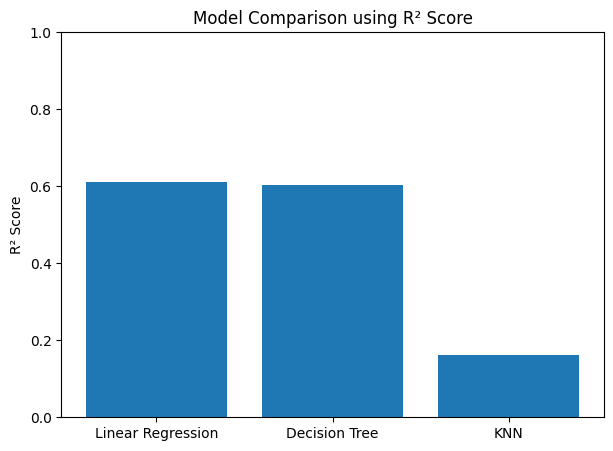

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'KNN']
r2_scores = [r2_lr, r2_dt, r2_knn]

plt.figure(figsize=(7,5))
plt.bar(models, r2_scores)
plt.ylabel('R² Score')
plt.title('Model Comparison using R² Score')
plt.ylim(0, 1)
plt.show()


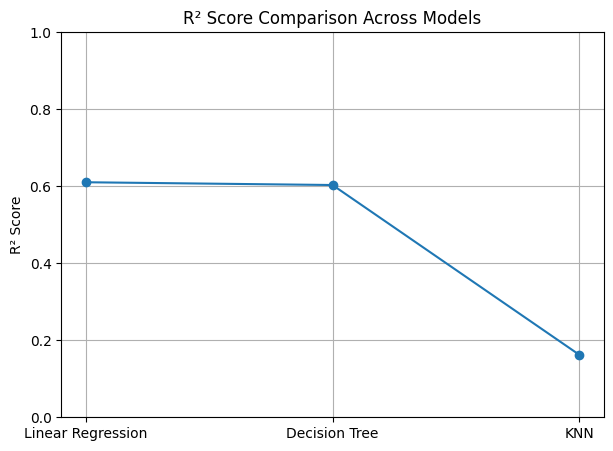

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(models, r2_scores, marker='o')
plt.ylabel('R² Score')
plt.title('R² Score Comparison Across Models')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


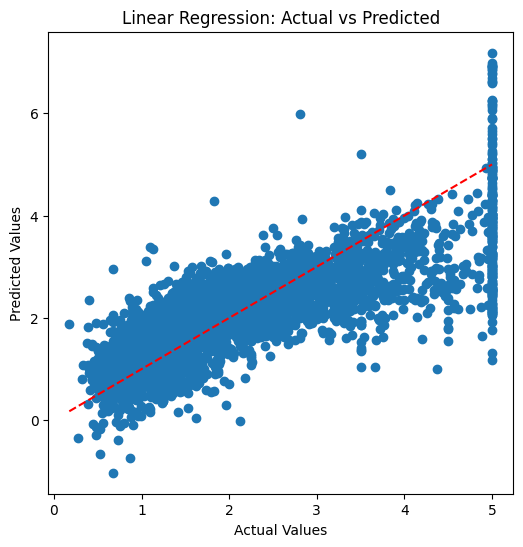

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")

# Perfect prediction line
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')

plt.show()


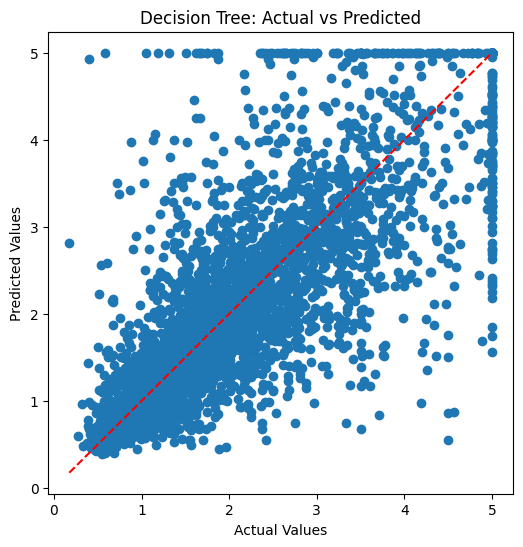

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs Predicted")

plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')

plt.show()


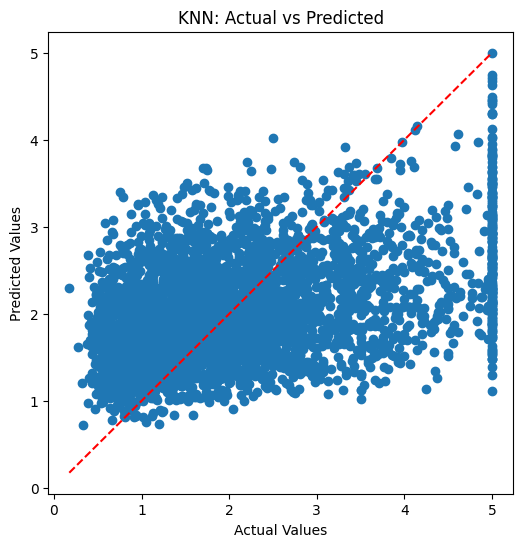

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN: Actual vs Predicted")

plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')

plt.show()


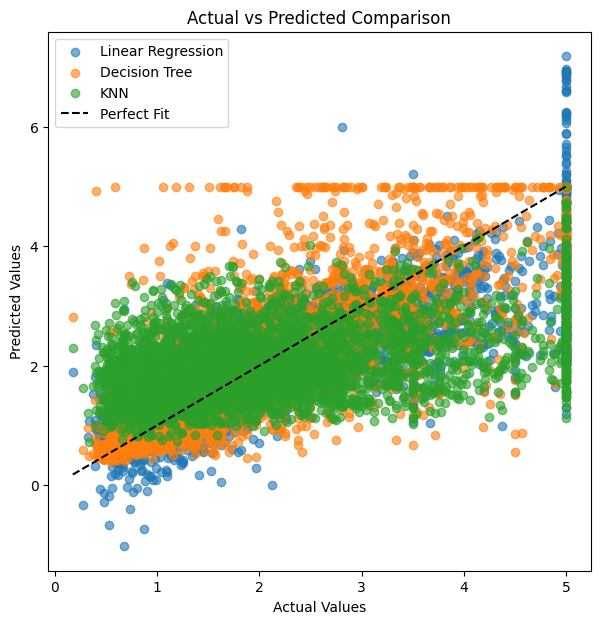

In [ ]:
plt.figure(figsize=(7,7))

plt.scatter(Y_test, y_pred1, label='Linear Regression', alpha=0.6)
plt.scatter(Y_test, y_pred2, label='Decision Tree', alpha=0.6)
plt.scatter(Y_test, y_pred3, label='KNN', alpha=0.6)

plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'k--', label='Perfect Fit')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Re-split the California Housing data to ensure consistent X_train, Y_train for this section
X_train, X_test, Y_train, Y_test = train_test_split(X_housing, Y_housing , train_size=0.80, test_size=0.20, random_state=123)

# Bagging with Decision Tree as base estimator
bag_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)

bag_dt.fit(X_train, Y_train)

# Predictions
y_pred_bag_dt = bag_dt.predict(X_test)

# R2 score
r2_bag_dt = r2_score(Y_test, y_pred_bag_dt)
print("R² score for Bagging Decision Tree:", r2_bag_dt)

R² score for Bagging Decision Tree: 0.8116358449920281


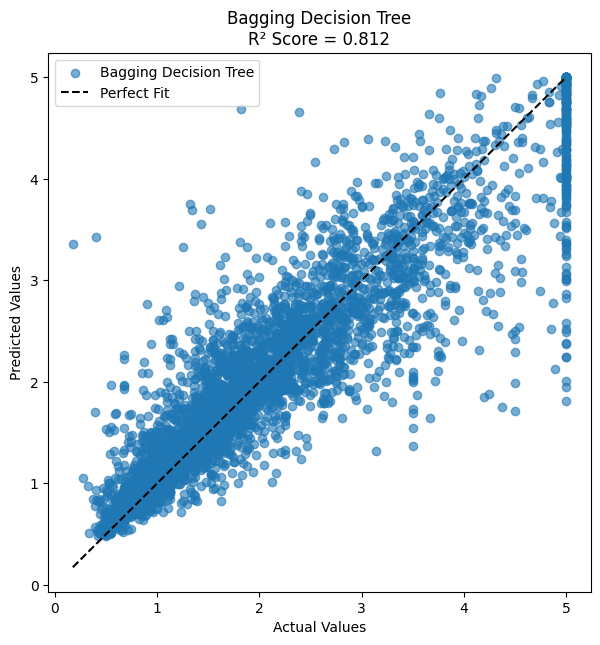

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

plt.scatter(
    Y_test,
    y_pred_bag_dt,
    alpha=0.6,
    label='Bagging Decision Tree'
)

# Perfect prediction line
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    'k--',
    label='Perfect Fit'
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Bagging Decision Tree\nR² Score = {r2_bag_dt:.3f}")
plt.legend()
plt.show()


#EXAMPLE 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Ames Housing dataset
housing = fetch_openml(name="house_prices", as_frame=True)

# Features and target
X = housing.data
y = housing.target

print(X.shape, y.shape)


(1460, 80) (1460,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


#Preprocessing Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Separate column types
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


#🌳 Decision Tree Regressor – Tree Visualization

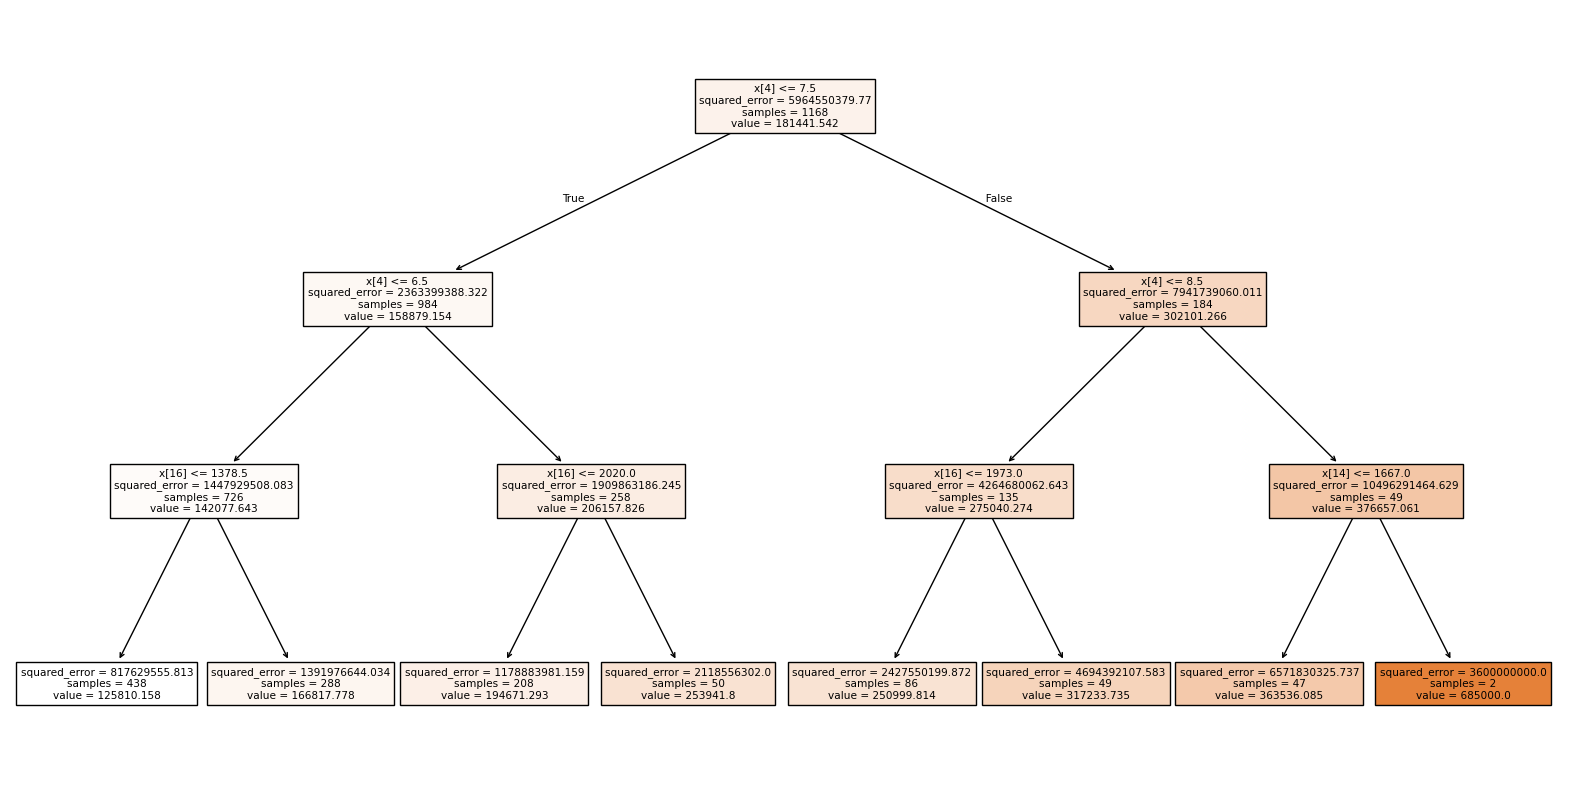

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

dt_model = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(
    dt_model.named_steps['model'],
    filled=True,
    max_depth=3
)
plt.show()


#📈 Linear Regression – Actual vs Predicted

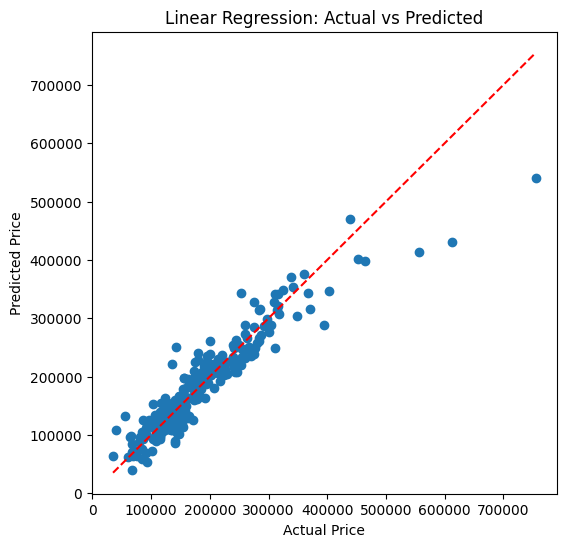

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()


#🌲 Random Forest – Feature Importance Visualization

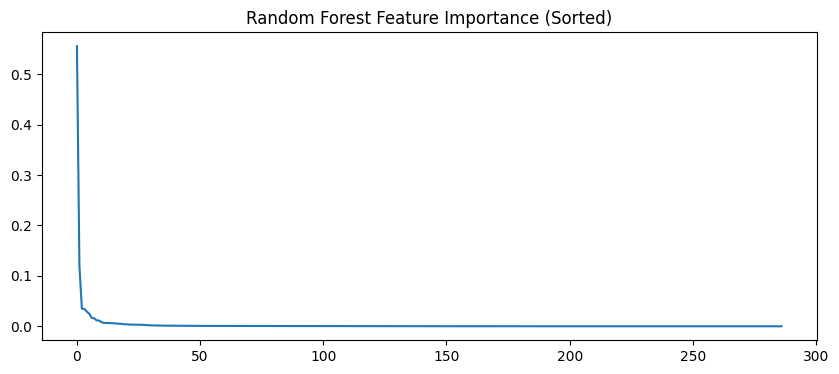

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

# Extract feature importance
rf = rf_model.named_steps['model']
importances = rf.feature_importances_

plt.figure(figsize=(10,4))
plt.plot(sorted(importances, reverse=True))
plt.title("Random Forest Feature Importance (Sorted)")
plt.show()


#🌲🌲 Bagging Regressor – Prediction Visualization

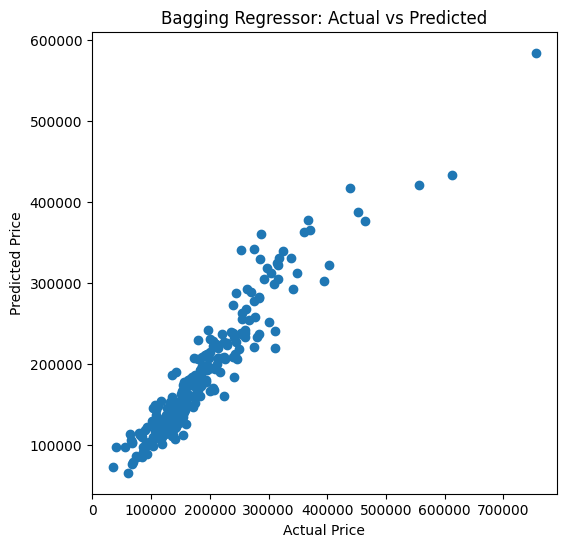

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_model = Pipeline([
    ('prep', preprocessor),
    ('model', BaggingRegressor(
        n_estimators=50,
        random_state=42
    ))
])

bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_bag)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Bagging Regressor: Actual vs Predicted")
plt.show()


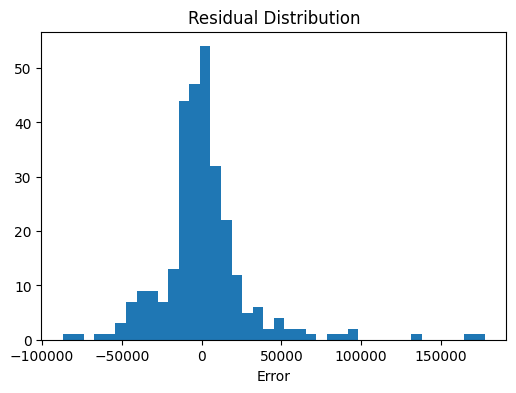

In [ ]:
residuals = y_test - y_pred_bag

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40)
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    bag_model,
    X,
    y,
    cv=5,
    scoring='r2'
)

scores.mean()


np.float64(0.8565010867109539)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'model__n_estimators': [50, 100],
}

grid = GridSearchCV(
    bag_model,
    params,
    cv=3,
    scoring='r2'
)

grid.fit(X_train, y_train)
grid.best_params_


{'model__n_estimators': 100}